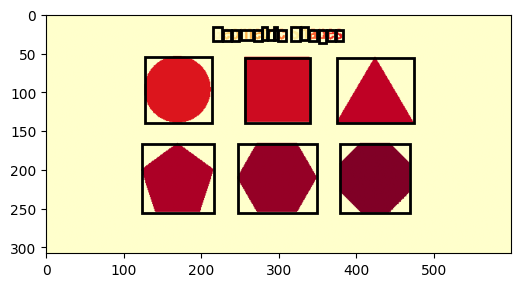

In [2]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
a = np.asarray(data)
thres = threshold_otsu(a)
b = a > thres
c = label(b)
cl = Image.fromarray(c)
iio.imsave('label_output.png', cl)
properties = ['Area', 'Centroid', 'BoundingBox']
d = regionprops(c)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(c, cmap='YlOrRd')

for i in d:
    lr, lc, ur, uc = i['BoundingBox']
    rec_width = uc - lc
    rec_height = ur - lr
    rect = mpatches.Rectangle((lc, lr), rec_width, rec_height, fill=False,
                              edgecolor='black', linewidth=2)
    ax.add_patch(rect)
plt.show()

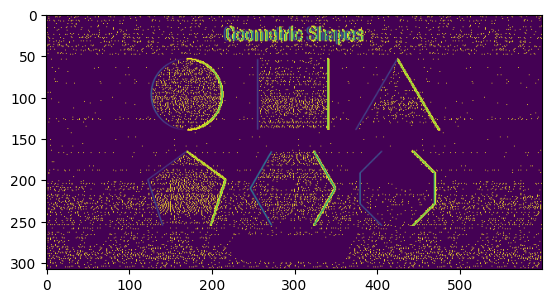

In [ ]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
bmg = abs(data - nd.shift(data, (0, 1), order=0))
plt.imshow(bmg)
plt.show()

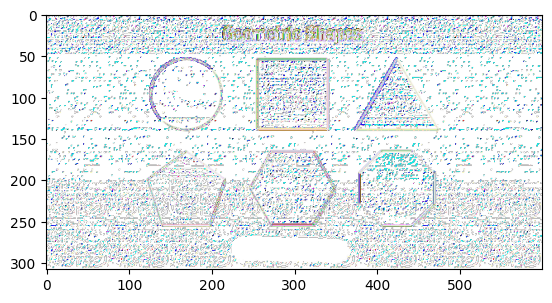

In [2]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu
data = Image.open('geometric.png')
a = nd.sobel(data ,axis=0)
b = nd.sobel(data ,axis=1)
bmg = abs(a) + abs(b)
plt.imshow(bmg)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-49.800000000000004..255.0].


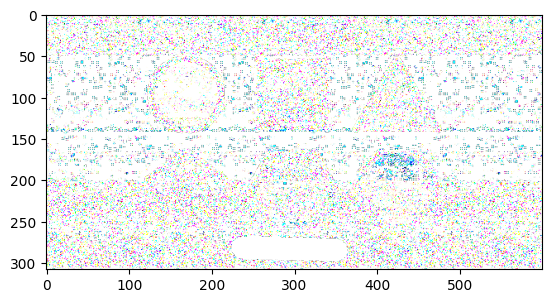

In [ ]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as ndi
from skimage.morphology import disk
from skimage.measure import regionprops
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

def Harris(indata, alpha=0.2):
    x = nd.sobel(indata, 0)
    y = nd.sobel(indata, 1)
    xy = abs(x * y)
    x2 = nd.gaussian_filter(x ** 2, sigma=1)
    y2 = nd.gaussian_filter(y ** 2, sigma=1)
    detC = x2 * y2 - xy ** 2
    trC = x2 + y2
    response = detC - alpha * trC ** 2
    return response  

data = Image.open('geometric.png')
bmg = Harris(data)
plt.imshow(bmg)
plt.show()

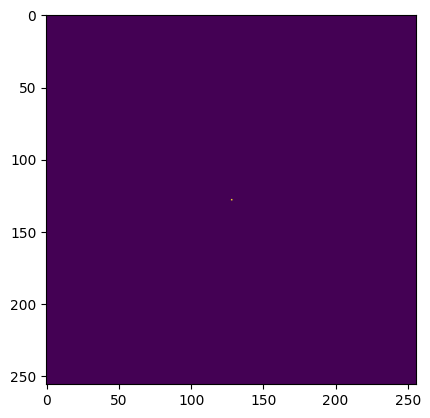

In [ ]:
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as ndi
from skimage.morphology import disk
from skimage.measure import regionprops
import matplotlib.pyplot as plt
from skimage.util import img_as_float

def LineHough(data, gamma):
    w = data.shape[1]
    h = data.shape[0]
    theta = np.arange(0, np.pi, 0.01)
    r = np.arange(-np.sqrt(w**2 + h**2), np.sqrt(w**2 + h**2), 1)


data = np.zeros((256, 256))
data[128, 128] = 1
plt.imshow(data)
plt.show()

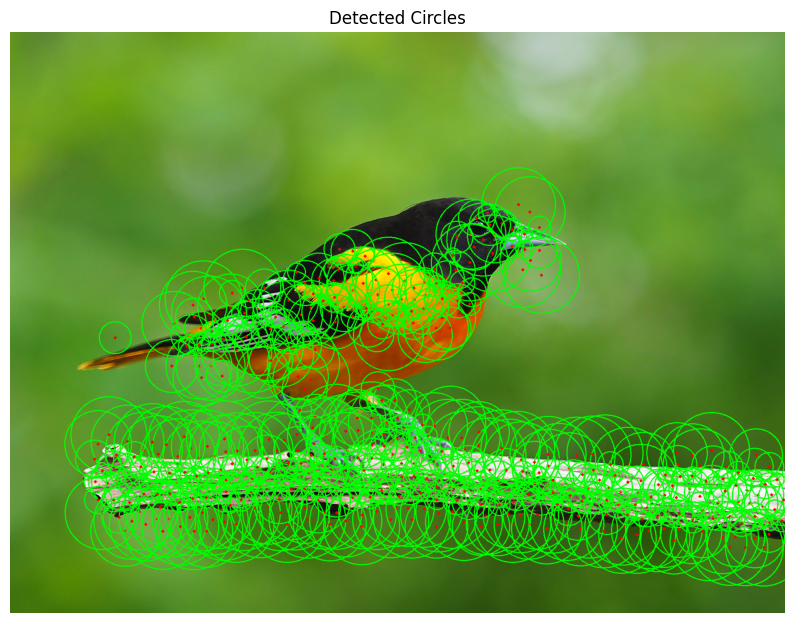

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('bird.png')
if img is None:
    raise FileNotFoundError("Không tìm thấy file 'bird.png'!")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=30,
    param1=50,
    param2=30,
    minRadius=10,
    maxRadius=100
)

output = img.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 2)  # Đường tròn
        cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)     # Tâm

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Detected Circles')
plt.show()

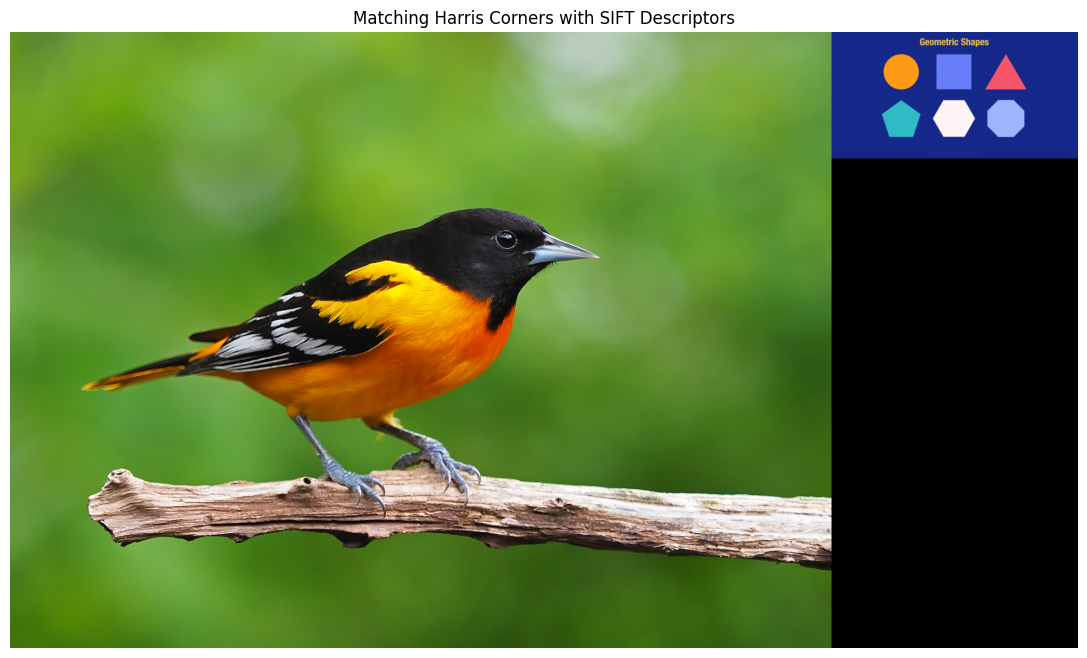

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('bird.png')
img2 = cv2.imread('geometric.png')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

dst1 = cv2.cornerHarris(np.float32(gray1), 2, 3, 0.04)
dst2 = cv2.cornerHarris(np.float32(gray2), 2, 3, 0.04)

pts1 = np.argwhere(dst1 > 0.01 * dst1.max())
pts2 = np.argwhere(dst2 > 0.01 * dst2.max())

kp1 = [cv2.KeyPoint(float(x[1]), float(x[0]), 8) for x in pts1]
kp2 = [cv2.KeyPoint(float(x[1]), float(x[0]), 8) for x in pts2]

sift = cv2.SIFT_create()
kp1, des1 = sift.compute(gray1, kp1)
kp2, des2 = sift.compute(gray2, kp2)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

img_match = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)

plt.figure(figsize=(15, 8))
plt.imshow(cv2.cvtColor(img_match, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Matching Harris Corners with SIFT Descriptors')
plt.show()